<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/main/Optiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [3]:
# Create the directory for kaggle.json
!mkdir -p ~/.kaggle

# Move the uploaded file to the Kaggle directory
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle competitions download -c 'optiver-trading-at-the-close'
! unzip optiver-trading-at-the-close.zip
! rm -rf optiver-trading-at-the-close.zip

 98% 197M/201M [00:02<00:00, 108MB/s] 
100% 201M/201M [00:02<00:00, 79.0MB/s]
Archive:  optiver-trading-at-the-close.zip
  inflating: example_test_files/revealed_targets.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/test.csv  
  inflating: optiver2023/__init__.py  
  inflating: optiver2023/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: public_timeseries_testing_util.py  
  inflating: train.csv               


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

In [6]:
train=  pd.read_csv('train.csv')


In [7]:
train = train[(train['stock_id']==142)  & (train['date_id'] == 0)]

In [ ]:
day1 = train[(train['stock_id'] == 142) & (train['date_id'] == 1)]


In [ ]:
train[['time_id','target']].head(60)

,time_id,target
0,0,-3.029704
191,1,0.389814
382,2,4.220009
573,3,5.450249
764,4,3.169775
955,5,0.599623
1146,6,-0.200272
1337,7,2.410412
1528,8,-0.389814
1719,9,-4.339814


# Data Visualization


In [ ]:
desc = pd.DataFrame(index = list(train))
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['type'] = train.dtypes
desc = pd.concat([desc, train.describe().T], axis = 1)
desc

,count,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
stock_id,26455,1,0.003780,0,int64,26455.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
date_id,26455,481,1.818182,0,int64,26455.0,2.400000e+02,1.388551e+02,0.000000e+00,1.200000e+02,2.400000e+02,3.600000e+02,4.800000e+02
seconds_in_bucket,26455,55,0.207900,0,int64,26455.0,2.700000e+02,1.587481e+02,0.000000e+00,1.300000e+02,2.700000e+02,4.100000e+02,5.400000e+02
imbalance_size,26455,17032,64.381024,0,float64,26455.0,4.210671e+06,8.321268e+06,0.000000e+00,3.530554e+05,2.054860e+06,5.191645e+06,1.334539e+08
imbalance_buy_sell_flag,26455,3,0.011340,0,int64,26455.0,-1.553960e-01,8.909329e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
reference_price,26455,5202,19.663580,0,float64,26455.0,9.998347e-01,1.678553e-03,9.913560e-01,9.989750e-01,9.998270e-01,1.000698e+00,1.009097e+00
matched_size,26455,16652,62.944623,0,float64,26455.0,2.575498e+07,2.104866e+07,4.161774e+06,1.452460e+07,2.106527e+07,2.963809e+07,2.256941e+08
far_price,11938,4094,15.475335,14517,float64,11938.0,9.968264e-01,1.712932e-02,6.562130e-01,9.946060e-01,9.990640e-01,1.001590e+00,1.174934e+00
near_price,12025,4722,17.849178,14430,float64,12025.0,9.973373e-01,1.332079e-02,8.934080e-01,9.961260e-01,9.992260e-01,1.001200e+00,1.103863e+00
bid_price,26455,5080,19.202419,0,float64,26455.0,9.997355e-01,1.674588e-03,9.911610e-01,9.988685e-01,9.997360e-01,1.000599e+00,1.009097e+00


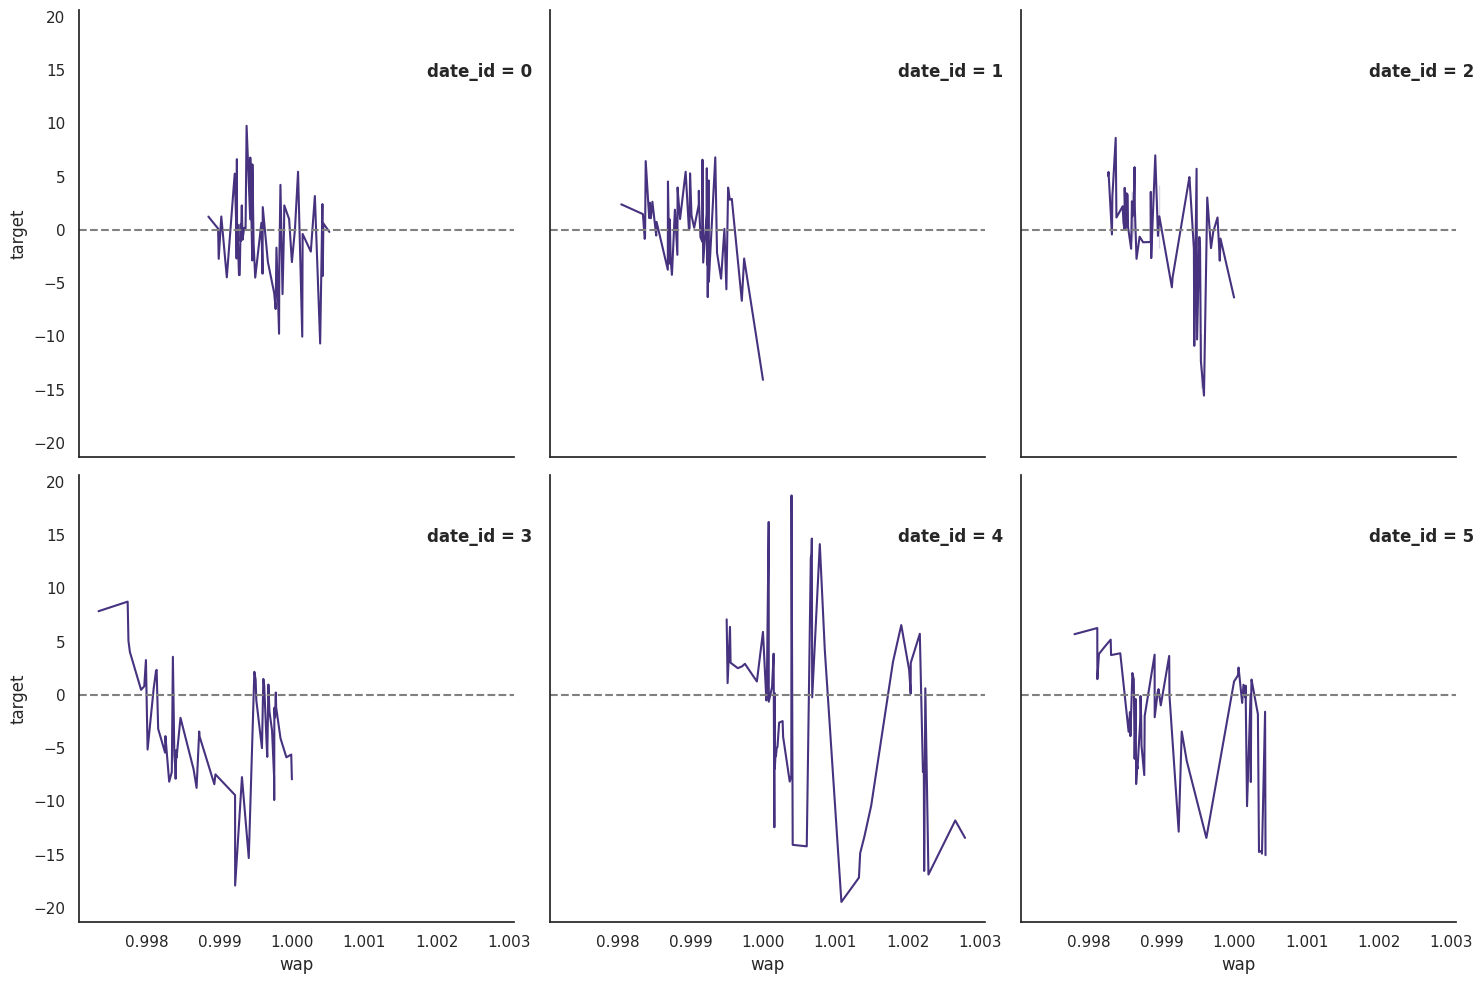

In [ ]:
g = sns.relplot(
    data=train.query(" date_id < 6"),
    x="wap",
    y="target",
    kind="line",
    col="date_id",
    col_wrap=3
)
g.refline(y=0)
for date_id, ax in g.axes_dict.items():
    ax.text(.8, .85, f"date_id = {date_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.tight_layout()
plt.show()

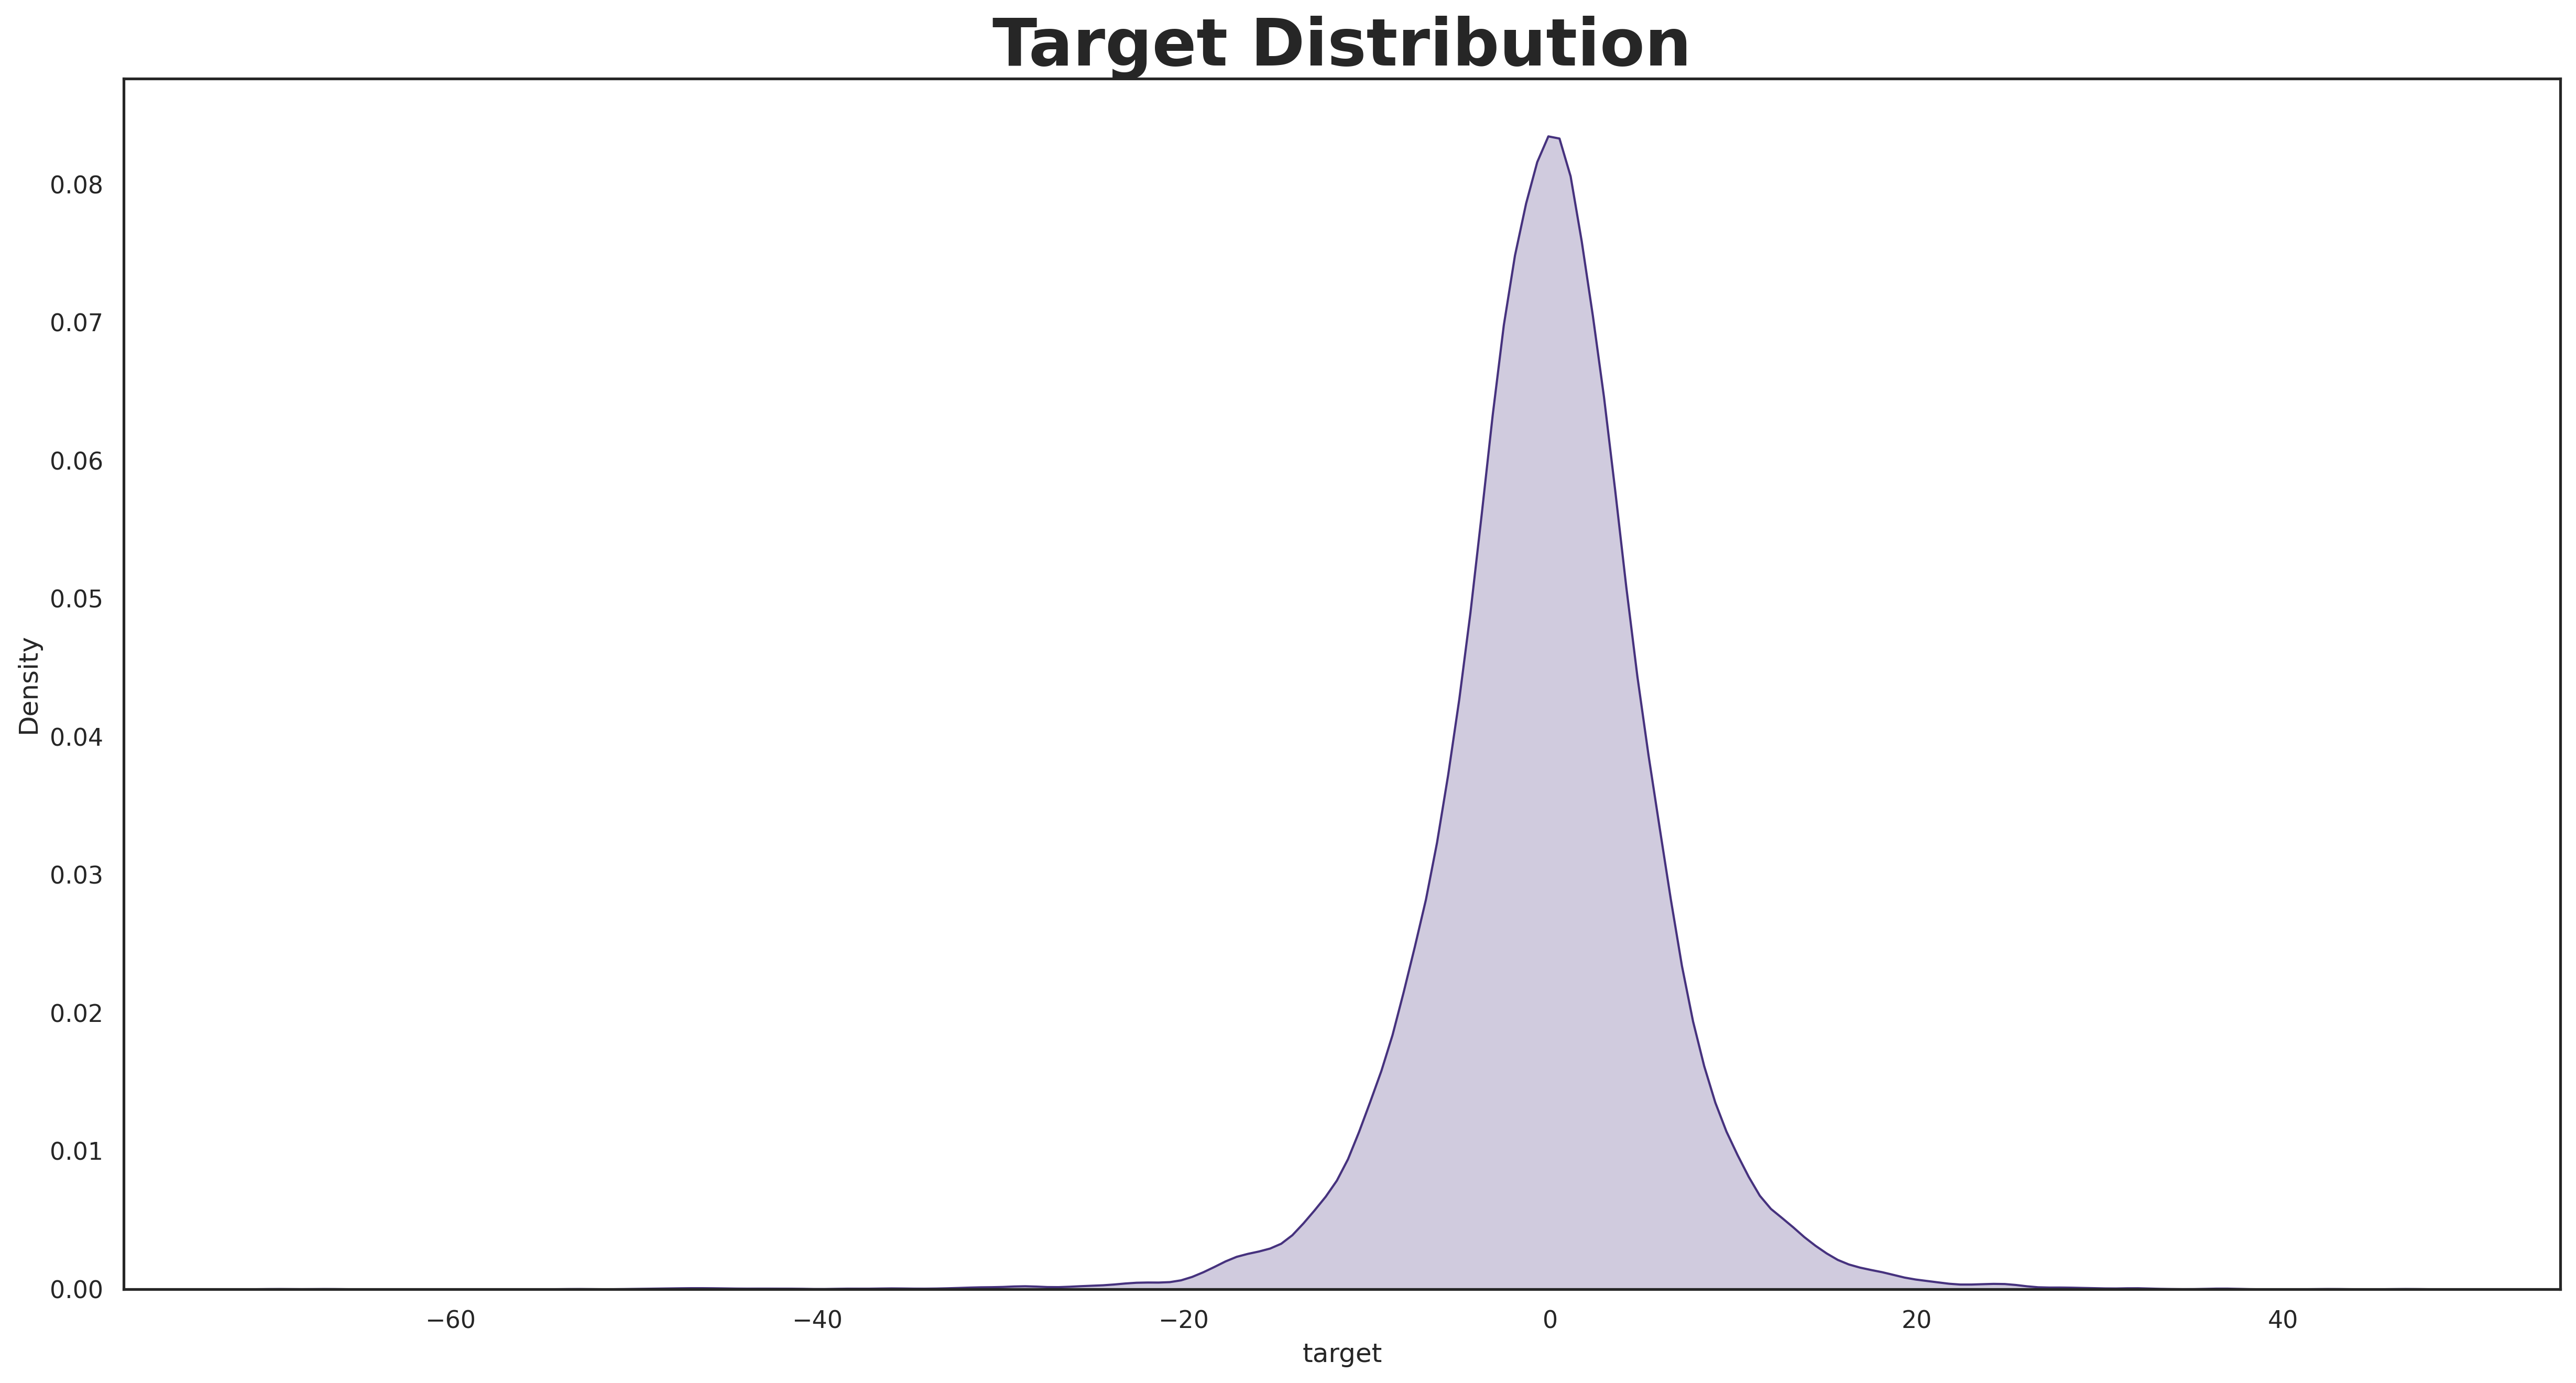

In [ ]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.kdeplot(train.target, fill = True)

plt.title('Target Distribution', weight = 'bold', fontsize = 30)
plt.show()

# Trend Analysis


In [8]:
train = train.filter(['time_id', 'target'])
train = train.set_index('time_id')


In [ ]:
train.head(55)


,target
time_id,
0,-3.029704
1,0.389814
2,4.220009
3,5.450249
4,3.169775
5,0.599623
6,-0.200272
7,2.410412
8,-0.389814


In [ ]:
train = train[train['stock_id']<30]

In [ ]:
traind = pd.read_csv('shortlisted.csv')

In [9]:
start, end = 0,55

In [ ]:
traind = traind.filter(['time_id','target']).set_index('time_id')

In [ ]:
train.to_csv('shortlisted.csv')

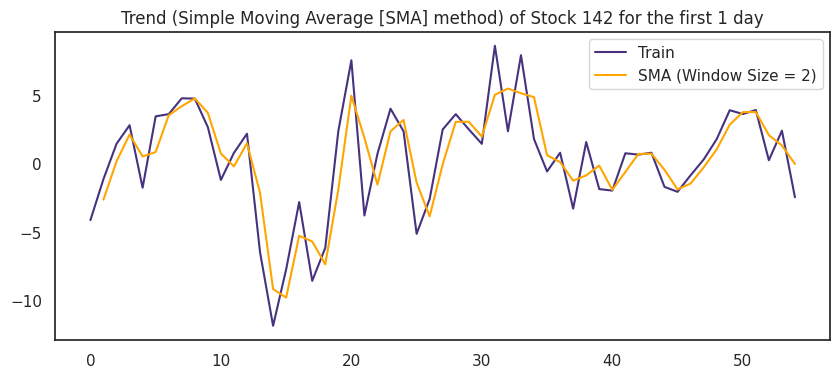

In [10]:
moving_average = train[start:end].rolling(window=2).mean()
y1 = train['target']
y2 = moving_average

plt.figure(figsize=(10, 4))
plt.title(f'Trend (Simple Moving Average [SMA] method) of Stock 142 for the first 1 day')
plt.plot(train['target'][start:end], label='Train', linestyle='-')
plt.plot(moving_average[start:end], label=f'SMA (Window Size = {2})', linestyle='-', color='orange')
plt.legend()
plt.show()


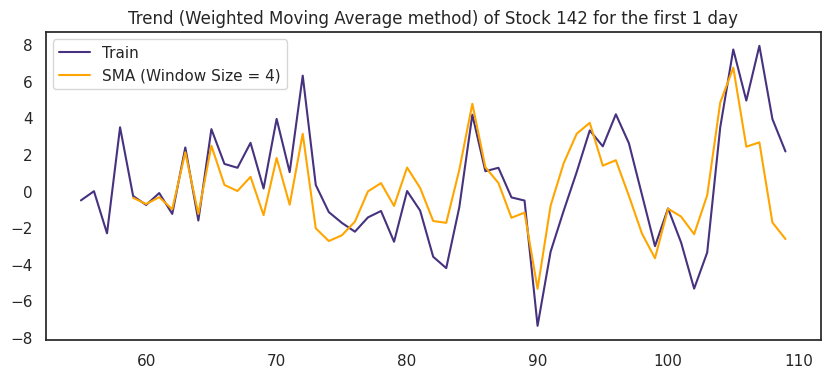

In [ ]:
window_size = 4
weights = [0.1,0.3, 0.5, 0.7]
weighted_average = train['target'].diff().rolling(window=4).apply(lambda x: (x * weights).sum(), raw=True)

plt.figure(figsize=(10, 4))
plt.title(f'Trend (Weighted Moving Average method) of Stock 142 for the first 1 day')
plt.plot(train['target'][start:end], label='Train', linestyle='-')
plt.plot(weighted_average[start:end], label=f'SMA (Window Size = {window_size})', linestyle='-', color='orange')
plt.legend()
plt.show()

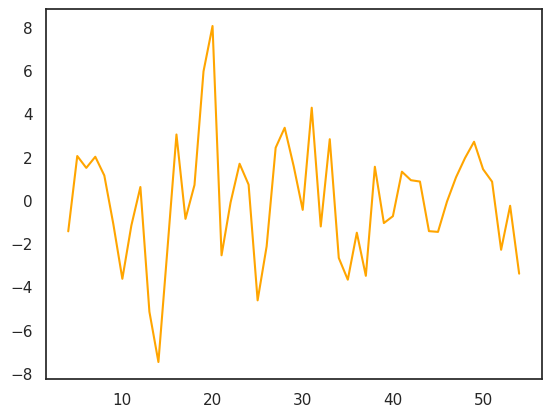

In [ ]:
plt.plot(weighted_average[start:end], label=f'SMA (Window Size = {window_size})', linestyle='-', color='orange')

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test statistics', 'P-value', '# Lags', '# observations']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary.')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary.')

start, end = 0, 55

adfuller_test(weighted_average.dropna())

adfuller_test(train[start:end].diff().dropna())
wa =weighted_average.dropna()



ADF test statistics : -38.40262822169303
P-value : 0.0
# Lags : 48
# observations : 26402
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary.


ValueError: ignored

In [ ]:
weighted_average

KeyError: ignored

# BASIC LSTM Model


In [ ]:
train[start:end].diff().dropna()

,time_id,target
time_id,,
1,1.0,3.419518
2,1.0,3.830195
3,1.0,1.230240
4,1.0,-2.280474
5,1.0,-2.570152
6,1.0,-0.799894
7,1.0,2.610683
8,1.0,-2.800226
9,1.0,-3.950000


In [ ]:
weighted_average.shape

(55,)

In [185]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train[start:end].diff().dropna())

train_data, test_data = scaled_data[start:49, :], scaled_data[42:end, :]
# train_data  = scaled_data[start:end-9, :]
def create_sequences(dataset, look_back=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        data_X.append(a)
        data_Y.append(dataset[i + look_back, 0])
    return np.array(data_X), np.array(data_Y)

look_back = 3
train_X, train_Y = create_sequences(train_data, look_back)

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))

model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = .001))
model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=2)

train_predict = model.predict(train_X)
train_predict = train_predict.reshape(-1, 1)
train_predict = scaler.inverse_transform(train_predict)

Epoch 1/100
46/46 - 3s - loss: 0.2914 - 3s/epoch - 60ms/step
Epoch 2/100
46/46 - 0s - loss: 0.1065 - 69ms/epoch - 1ms/step
Epoch 3/100
46/46 - 0s - loss: 0.0651 - 75ms/epoch - 2ms/step
Epoch 4/100
46/46 - 0s - loss: 0.0627 - 76ms/epoch - 2ms/step
Epoch 5/100
46/46 - 0s - loss: 0.0614 - 77ms/epoch - 2ms/step
Epoch 6/100
46/46 - 0s - loss: 0.0607 - 76ms/epoch - 2ms/step
Epoch 7/100
46/46 - 0s - loss: 0.0604 - 77ms/epoch - 2ms/step
Epoch 8/100
46/46 - 0s - loss: 0.0600 - 77ms/epoch - 2ms/step
Epoch 9/100
46/46 - 0s - loss: 0.0571 - 79ms/epoch - 2ms/step
Epoch 10/100
46/46 - 0s - loss: 0.0563 - 85ms/epoch - 2ms/step
Epoch 11/100
46/46 - 0s - loss: 0.0561 - 77ms/epoch - 2ms/step
Epoch 12/100
46/46 - 0s - loss: 0.0581 - 80ms/epoch - 2ms/step
Epoch 13/100
46/46 - 0s - loss: 0.0578 - 75ms/epoch - 2ms/step
Epoch 14/100
46/46 - 0s - loss: 0.0544 - 76ms/epoch - 2ms/step
Epoch 15/100
46/46 - 0s - loss: 0.0540 - 75ms/epoch - 2ms/step
Epoch 16/100
46/46 - 0s - loss: 0.0538 - 77ms/epoch - 2ms/step
Ep

In [ ]:
test_X,_ =create_sequences(test_data, look_back)

In [82]:
len(test_data)

8

# Testing

In [ ]:
revealed_targets = pd.read_csv('/content/example_test_files/revealed_targets.csv')
revealed_targets = revealed_targets[revealed_targets['stock_id']==142]

new_df.head(10)

,revealed_target
revealed_time_id,
26235.0,1.150370
26236.0,8.549690
26237.0,-0.489950
26238.0,4.899502
26239.0,2.059937
26240.0,7.460117
26241.0,5.079508
26242.0,4.889965
26243.0,7.859469


In [186]:
# revealed_targets = pd.read_csv('/content/example_test_files/revealed_targets.csv')
# revealed_targets = revealed_targets[revealed_targets['stock_id']==142]
# new_df =revealed_targets.filter(['revealed_time_id','revealed_target'])


# scaled_test = scaler.fit_transform(new_df.diff().dropna())
# test_data  = scaled_test[end:end+6, :]

test_X, test_Y = create_sequences(test_data, look_back)

test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

test_predict = model.predict(test_X)

test_predict = scaler.inverse_transform(test_predict)




1/1 [==============================] - 0s 14ms/step


In [134]:
test_predict

array([[-0.68991643],
       [ 0.5815616 ],
       [ 0.8691062 ],
       [-0.13719606],
       [-1.0964644 ],
       [-1.4571474 ],
       [-1.8219844 ],
       [-1.2470102 ],
       [-0.5724625 ],
       [ 0.950024  ],
       [ 0.47811016]], dtype=float32)

In [187]:
from sklearn.metrics import mean_absolute_error
test_Y_actual_flat = test_Y.flatten()
test_predict_actual_flat = test_predict.flatten()
mae = mean_absolute_error(test_Y_actual_flat, test_predict_actual_flat)




In [ ]:
test = pd.read_csv('/content/example_test_files/test.csv')
test = test[test['stock_id']==142]
test.head()


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id,currently_scored
142,142,478,0,17470638.35,-1,1.000088,1.044330e+08,NaN,NaN,0.999995,859.01,1.001112,179733.73,1.000000,26290,478_0_142,False
342,142,478,10,17626119.99,-1,1.000414,1.044424e+08,NaN,NaN,1.000577,30082.85,1.001124,859.98,1.001109,26291,478_10_142,False
542,142,478,20,17726624.70,-1,1.000926,1.044424e+08,NaN,NaN,1.000588,515712.00,1.001403,26666.82,1.001363,26292,478_20_142,False
742,142,478,30,17870939.14,-1,1.001229,1.044424e+08,NaN,NaN,1.000926,96298.72,1.001578,6022.59,1.001540,26293,478_30_142,False
942,142,478,40,17165688.18,-1,1.001415,1.051872e+08,NaN,NaN,1.001345,18063.57,1.001915,154918.80,1.001405,26294,478_40_142,False


In [77]:
test_predict

array([[1.5528501],
       [0.981723 ]], dtype=float32)

In [ ]:
#plt.plot(np.arange(look_back, len(train_predict) + look_back), train_predict, label='Train Predictions', color='green')
print(f'The Mean Squared Error is {mae:.2f}')
plt.plot(np.arange(len(train_predict) , len(train_predict) + len(test_predict) ), test_predict, label='Test Predictions', color='orange')
#


plt.plot(np.arange(start,47 ), train[start:47], label='Train', color='blue')
#plt.plot(np.arange(start, end), train[start:end], label='Original Time Series', color='green')
plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [145]:
len(train_predict) + len(test_predict)

57

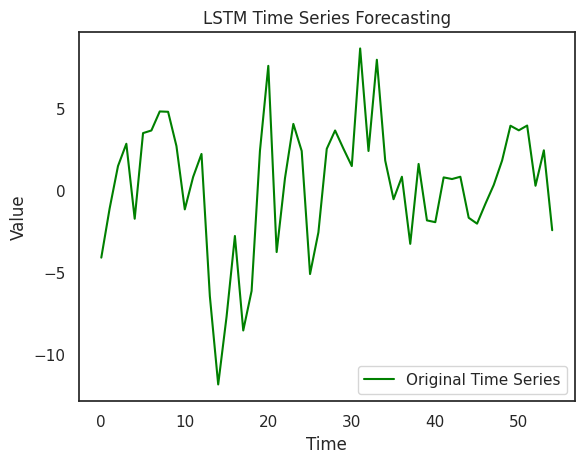

In [178]:
plt.plot(np.arange(start, end), train[start:end], label='Original Time Series', color='green')
plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [175]:
import pickle
# with open("lstm.h5", 'wb') as file:
#     pickle.dump(model, file)
model.save("lstm.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

# adfuller_test(new_df[start:end].diff().dropna())

ValueError: ignored

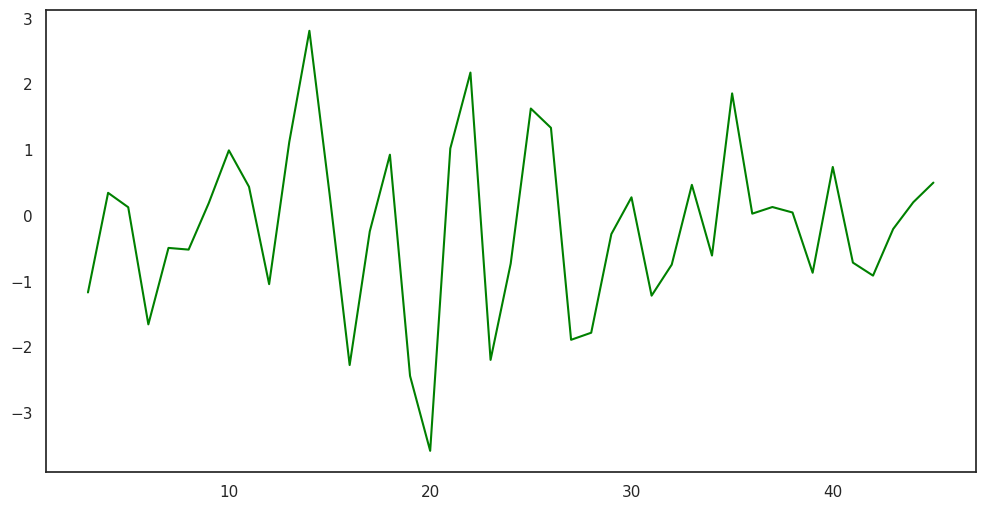

In [ ]:
# plt.figure(figsize=(12, 6))
# plt.plot(np.arange(look_back, len(train_predict) + look_back), train_predict, label='Train Predictions', color='green')
# plt.plot(np.arange(look_back , len(train_predict) + len(test_predict) ), test_predict, label='Test Predictions', color='orange')

# # Plot the original time series within the specified range
# plt.plot(np.arange(start, end), train[start:end].diff(), label='Original Time Series', color='blue')
# plt.show()

In [ ]:
train.index.max()

## References:


1.   [LSTM for Time Series Prediction in PyTorch](https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/)
2.   [Optiver 2023 Basic Submission Demo](https://www.kaggle.com/code/sohier/optiver-2023-basic-submission-demo)


